In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob

from keras_transfer_learning import data, utils

Using TensorFlow backend.


TODOs:

* read https://arxiv.org/pdf/1805.12462.pdf

In [2]:
print('\n'.join(sorted([f.rpartition(os.path.sep)[-1] for f in glob.glob(os.path.join('.', 'models', '*'))])))

A00_unet_stardist_hl60-high-noise_P_002
A00_unet_stardist_hl60-high-noise_P_005
A00_unet_stardist_hl60-high-noise_P_010
A00_unet_stardist_hl60-high-noise_P_050
A00_unet_stardist_hl60-high-noise_P_200
A00_unet_stardist_hl60-high-noise_R_002
A00_unet_stardist_hl60-high-noise_R_005
A00_unet_stardist_hl60-high-noise_R_010
A00_unet_stardist_hl60-high-noise_R_050
A00_unet_stardist_hl60-high-noise_R_200
A00_unet_stardist_hl60-high-noise_R_F
A00_unet_stardist_hl60-low-noise_P_002
A00_unet_stardist_hl60-low-noise_P_005
A00_unet_stardist_hl60-low-noise_P_010
A00_unet_stardist_hl60-low-noise_P_050
A00_unet_stardist_hl60-low-noise_P_200
A00_unet_stardist_hl60-low-noise_R_002
A00_unet_stardist_hl60-low-noise_R_005
A00_unet_stardist_hl60-low-noise_R_010
A00_unet_stardist_hl60-low-noise_R_050
A00_unet_stardist_hl60-low-noise_R_200
A00_unet_stardist_hl60-low-noise_R_F
A01_unet_stardist_hl60-high-noise_P_002
A01_unet_stardist_hl60-high-noise_P_005
A01_unet_stardist_hl60-high-noise_P_010
A01_unet_stardi

In [3]:
model_name = 'A00_unet_stardist_hl60-high-noise_R_F'
dataset_name = 'hl60_low-noise'

In [9]:
def compute_distance_for(model_name, dataset_name):
    # Get the model config
    model_config = utils.utils.yaml_load(utils.utils.path_to_model_config(model_name))
    # Get the data config
    data_config = utils.utils.yaml_load(os.path.join('configs', 'data', dataset_name + '.yaml'))
    # Compute the fenchet model distance
    return data.compare.frenchet_model_distance(model_config, data_config, 'activation_1')

In [10]:
compute_distance_for(model_name='A00_unet_stardist_hl60-high-noise_R_F', 
                     dataset_name='hl60_low-noise')

100%|██████████| 20/20 [00:01<00:00, 11.93it/s]


2197.3847772741133

In [11]:
compute_distance_for(model_name='A04_unet_stardist_hl60-high-noise_R_F', 
                     dataset_name='hl60_low-noise')

100%|██████████| 20/20 [00:01<00:00, 11.93it/s]


1150.800914515828

In [12]:
compute_distance_for(model_name='A01_unet_stardist_hl60-high-noise_R_F', 
                     dataset_name='hl60_low-noise')

100%|██████████| 20/20 [00:01<00:00, 11.91it/s]


3433.441491735197

In [21]:
model_name = 'C{:02d}_unet_stardist_dsb2018_R_F'
dataset_name = 'granulocyte'
distances = [compute_distance_for(model_name.format(i), dataset_name) for i in range(5)]

100%|██████████| 20/20 [00:01<00:00, 12.19it/s]


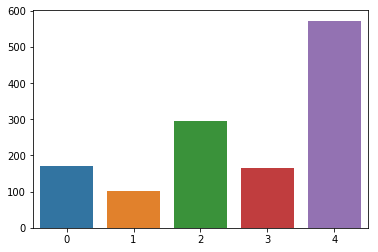

In [22]:
import seaborn as sns
import pandas as pd

sns.barplot(x=list(range(5)), y=distances)